In [1]:
import pandas as pd
import pandas.rpy.common as com
import numpy as np
from sklearn.feature_extraction import DictVectorizer

%load_ext autoreload
%autoreload 2

%load_ext rmagic

%matplotlib inline

%precision 2
pd.set_option('display.precision', 3)

import ndl

C:\Python27\lib\site-packages\IPython\extensions\rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [2]:
%%R
library(ndl)

In [3]:
data = com.load_data('numbers')
data['Cues'] = [x.split('_') for x in data['Cues']]
data['Number'] = data['Outcomes']
data

,Cues,Outcomes,Frequency,Number
1,"[size, shape, color, 1, exactly1]",1,455,1
2,"[size, shape, color, 1, 2, exactly2]",2,205,2
3,"[size, shape, color, 1, 2, 3, exactly3]",3,107,3
4,"[size, shape, color, 1, 2, 3, 4, exactly4]",4,60,4
5,"[size, shape, color, 1, 2, 3, 4, 5, exactly5]",5,50,5
6,"[size, shape, color, 1, 2, 3, 4, 5, 6, exactly6]",6,36,6
7,"[size, shape, color, 1, 2, 3, 4, 5, 6, 7, exac...",7,21,7
8,"[size, shape, color, 1, 2, 3, 4, 5, 6, 7, 8, e...",8,20,8
9,"[size, shape, color, 1, 2, 3, 4, 5, 6, 7, 8, 9...",9,13,9
10,"[size, shape, color, 1, 2, 3, 4, 5, 6, 7, 8, 9...",10,16,10


In [4]:
def activation(W):
    return pd.DataFrame([ndl.activation(c,W) for c in data.Cues],index=data.index)

# Singular / plural distinction

In [5]:
data['Outcomes'] = 'plural'
data['Outcomes'][1] = 'singular'
data

,Cues,Outcomes,Frequency,Number
1,"[size, shape, color, 1, exactly1]",singular,455,1
2,"[size, shape, color, 1, 2, exactly2]",plural,205,2
3,"[size, shape, color, 1, 2, 3, exactly3]",plural,107,3
4,"[size, shape, color, 1, 2, 3, 4, exactly4]",plural,60,4
5,"[size, shape, color, 1, 2, 3, 4, 5, exactly5]",plural,50,5
6,"[size, shape, color, 1, 2, 3, 4, 5, 6, exactly6]",plural,36,6
7,"[size, shape, color, 1, 2, 3, 4, 5, 6, 7, exac...",plural,21,7
8,"[size, shape, color, 1, 2, 3, 4, 5, 6, 7, 8, e...",plural,20,8
9,"[size, shape, color, 1, 2, 3, 4, 5, 6, 7, 8, 9...",plural,13,9
10,"[size, shape, color, 1, 2, 3, 4, 5, 6, 7, 8, 9...",plural,16,10


In [6]:
W = ndl.rw(data,M=10)
A = activation(W)
A

,plural,singular
1,0.09,0.29
2,0.13,0.23
3,0.16,0.22
4,0.14,0.23
5,0.14,0.23
6,0.14,0.23
7,0.14,0.23
8,0.14,0.23
9,0.14,0.23
10,0.14,0.23


With these associations, how many of the 15 items will the learner correctly label?

In [7]:
pd.DataFrame([data['Outcomes'], A.idxmax(1), A.idxmax(1) == data['Outcomes']], index = ['Truth', 'Prediction', 'Accurate?']).T

,Truth,Prediction,Accurate?
1,singular,singular,True
2,plural,singular,False
3,plural,singular,False
4,plural,singular,False
5,plural,singular,False
6,plural,singular,False
7,plural,singular,False
8,plural,singular,False
9,plural,singular,False
10,plural,singular,False


In [8]:
np.mean(A.idxmax(1) == data['Outcomes'])

0.07

How often are they correct (using relative item frequencies)?

In [9]:
float(sum(data['Frequency'] * (A.idxmax(1) == data['Outcomes']))) / float(sum(data['Frequency']))

0.46

In [10]:
def accuracy(data, M):
    W = ndl.rw(data, M=M)
    A = activation(W)
    return np.mean(A.idxmax(1) == data['Outcomes'])

In [11]:
accuracy(data, 10)

1.00

For a population of 100 learners trying to acquire the number system, what proportion are able to successfully label all 15 items given M trials?

In [12]:
np.mean([accuracy(data, M=10) == 1 for i in xrange(100)])

0.32

In [13]:
def population_accuracy(M=10, pop=100):
    return np.mean([accuracy(data, M=M) == 1 for i in xrange(pop)])

In [14]:
MAX_TRIALS = 500
P = {}

In [15]:
P['sg / pl'] = [population_accuracy(M=i) for i in xrange(1,MAX_TRIALS)]

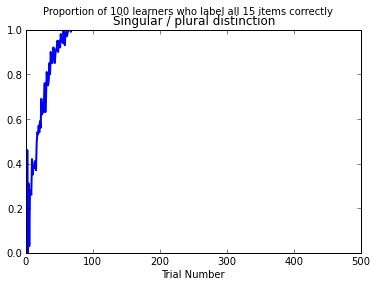

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(P['sg / pl'])+1), P['sg / pl'], '-', linewidth=2)
plt.title('Singular / plural distinction')
plt.xlabel('Trial Number')
plt.suptitle('Proportion of 100 learners who label all 15 items correctly')

# Dual / non-dual distinction

In [17]:
data['Outcomes'] = 'notdual'
data['Outcomes'][2] = 'dual'
data

,Cues,Outcomes,Frequency,Number
1,"[size, shape, color, 1, exactly1]",notdual,455,1
2,"[size, shape, color, 1, 2, exactly2]",dual,205,2
3,"[size, shape, color, 1, 2, 3, exactly3]",notdual,107,3
4,"[size, shape, color, 1, 2, 3, 4, exactly4]",notdual,60,4
5,"[size, shape, color, 1, 2, 3, 4, 5, exactly5]",notdual,50,5
6,"[size, shape, color, 1, 2, 3, 4, 5, 6, exactly6]",notdual,36,6
7,"[size, shape, color, 1, 2, 3, 4, 5, 6, 7, exac...",notdual,21,7
8,"[size, shape, color, 1, 2, 3, 4, 5, 6, 7, 8, e...",notdual,20,8
9,"[size, shape, color, 1, 2, 3, 4, 5, 6, 7, 8, 9...",notdual,13,9
10,"[size, shape, color, 1, 2, 3, 4, 5, 6, 7, 8, 9...",notdual,16,10


In [18]:
P['du / non-du'] = [population_accuracy(M=i) for i in xrange(1,MAX_TRIALS)]

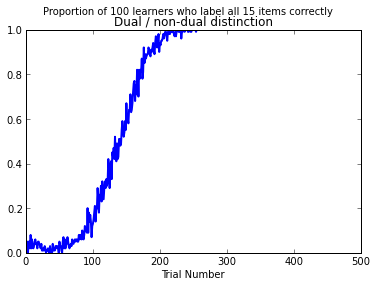

In [19]:
plt.plot(range(1,len(P['du / non-du'])+1), P['du / non-du'], '-', linewidth=2)
plt.title('Dual / non-dual distinction')
plt.xlabel('Trial Number')
plt.suptitle('Proportion of 100 learners who label all 15 items correctly')

# Singular, dual, plural

In [20]:
data['Outcomes'] = 'plural'
data['Outcomes'][1] = 'singular'
data['Outcomes'][2] = 'dual'

In [21]:
P['sg / du / pl'] = [population_accuracy(M=i) for i in xrange(1,MAX_TRIALS)]

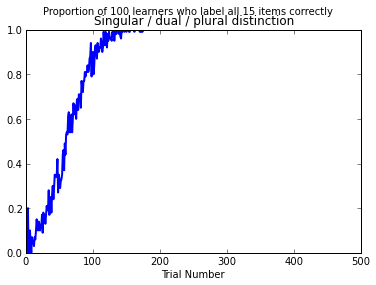

In [22]:
plt.plot(range(1,len(P['sg / du / pl'])+1), P['sg / du / pl'], '-', linewidth=2)
plt.title('Singular / dual / plural distinction')
plt.xlabel('Trial Number')
plt.suptitle('Proportion of 100 learners who label all 15 items correctly')

# Singular, dual, trial, plural

In [23]:
data['Outcomes'] = 'plural'
data['Outcomes'][1] = 'singular'
data['Outcomes'][2] = 'dual'
data['Outcomes'][3] = 'trial'

In [24]:
P['sg / du / tr / pl'] = [population_accuracy(M=i) for i in xrange(1,MAX_TRIALS)]

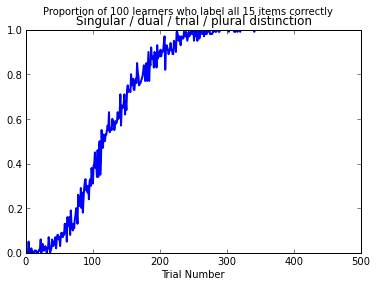

In [25]:
plt.plot(range(1,len(P['sg / du / tr / pl'])+1), P['sg / du / tr / pl'], '-', linewidth=2)
plt.title('Singular / dual / trial / plural distinction')
plt.xlabel('Trial Number')
plt.suptitle('Proportion of 100 learners who label all 15 items correctly')

# Singular, dual, trial, quadral, plural

In [26]:
data['Outcomes'] = 'plural'
data['Outcomes'][1] = 'singular'
data['Outcomes'][2] = 'dual'
data['Outcomes'][3] = 'trial'
data['Outcomes'][4] = '4ial'

In [27]:
P['sg / du / tr / qu / pl'] = [population_accuracy(M=i) for i in xrange(1,MAX_TRIALS)]

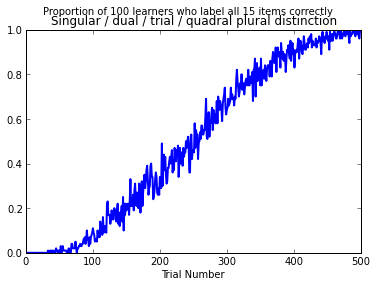

In [28]:
plt.plot(range(1,len(P['sg / du / tr / qu / pl'])+1), P['sg / du / tr / qu / pl'], '-', linewidth=2)
plt.title('Singular / dual / trial / quadral plural distinction')
plt.xlabel('Trial Number')
plt.suptitle('Proportion of 100 learners who label all 15 items correctly')

A prediction is that the typology of number systems should roughly correspond to how learnable each type of number system is

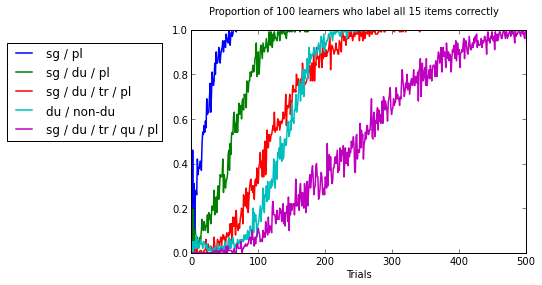

In [29]:
for n in ('sg / pl', 'sg / du / pl', 'sg / du / tr / pl', 'du / non-du', 'sg / du / tr / qu / pl'):
    plt.plot(range(1,len(P[n])+1), P[n], '-', linewidth=1.5, label=n)
    
plt.suptitle('Proportion of 100 learners who label all 15 items correctly')
plt.xlabel('Trials')
plt.legend(loc=(-0.55,0.5))